In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':[12,8]})

df = pd.read_pickle('STING_DB.pkl')

# Selecting only patients who had received BCG treatment
df.query('bcg == "Yes"', inplace=True)

# Clinical features

In [2]:
# Number of patients
df['id'].nunique()

19

In [3]:
# Patients' sex
df.groupby('sex')['id'].nunique().to_frame()

,id
sex,
Female,8
Male,11


In [4]:
# Patients' age at diagnosis, in years
df.groupby('id').agg({'age_dx':max}).describe().round().transpose()

,count,mean,std,min,25%,50%,75%,max
age_dx,19.0,68.0,9.0,49.0,61.0,69.0,75.0,82.0


In [5]:
# Follow-up, in months
df.groupby('id').agg({'fu_months':max}).describe().round().transpose()

,count,mean,std,min,25%,50%,75%,max
fu_months,19.0,42.0,23.0,15.0,23.0,39.0,50.0,116.0


In [6]:
# Patients´ outcome
df.groupby('outcome')['id'].nunique().to_frame()

,id
outcome,
Alive,16
Dead,2
Lost at follow-up,1


# Pathologic features

In [23]:
# Number of pathologic cases
df['sp'].nunique()

51

In [24]:
df.columns

Index(['n_patient', 'id', 'label', 'array', 'n_cores', 'sp', 'sp_date', 'turb',
       'histo', 'lesion', 'pt', 'recurrence', 'progression_grade',
       'progression_stage', 'progression_any', 'sting_tumor', 'sting_tumor_h',
       'sting_inflammatory', 'cgas_tumor', 'cgas_tumor_h', 'cgas_inflammatory',
       'pirf3_tumor', 'pirf3_tumor_h', 'pirf3_inflammatory', 'pdl1_tumor',
       'pdl1_tumor_n', 'pdl1_tumor_total', 'pdl1_tumor_location',
       'pdl1_tumor_h', 'pdl1_inflammatory', 'pdl1_inflammatory_location',
       'granuloma', 'pdl1_granuloma', 'host_response', 'foxp3_intratumoral',
       'foxp3_peritumoral', 'foxp3_intensity', 'foxp3_tumor',
       'foxp3_tumor_intensity', 'foxp3_tumor_percentage', 'cd8_intratumoral',
       'cd8ki67_intratumoral', 'cd8_peritumoral', 'cd8ki67_peritumoral',
       'ki67_tumor', 'sex', 'date_birth', 'date_dx', 'date_last_seen',
       'age_last_seen', 'age_dx', 'fu_days', 'outcome', 'bcg', 'bcg_date',
       'mitomycin', 'progression_stage_any'

In [25]:
unique = 'max'
estimator = 'mean'
df_sp = df.groupby('sp').agg({
    'pt':unique,
    'lesion':unique,
    'turb':unique,
    'recurrence_next':unique,
    'recurrence_any':unique,
    'progression_grade_next':unique,
    'progression_grade_any':unique,
    'progression_stage_next':unique,
    'progression_stage_any':unique,
    'sp_bcg_timing':unique,
    'sting_tumor':estimator,
    'sting_inflammatory':estimator,
    'cgas_tumor':estimator,
    'cgas_inflammatory':estimator,
    'pirf3_tumor':estimator,
    'pirf3_inflammatory':estimator
})
df_sp.head()
df_sp.to_pickle('DB_SP.pkl')

,pt
Tis,2
Ta,26
T1,16
T2,2
NaN,5


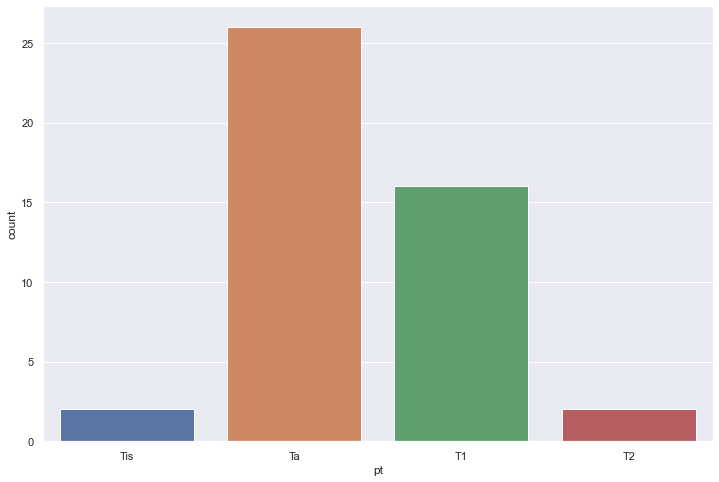

In [9]:
# pT stage
df_sp = df_sp.astype({'pt':'category'})
df_sp['pt'].cat.reorder_categories(['Tis','Ta','T1','T2'], ordered=True, inplace=True)
g = sns.countplot(x='pt', data=df_sp)
display(df_sp['pt'].value_counts(sort=False, dropna=False).to_frame())

,lesion
CIS,5
Invasive,48
High-grade,45
Non-tumor,11
Low-grade,47


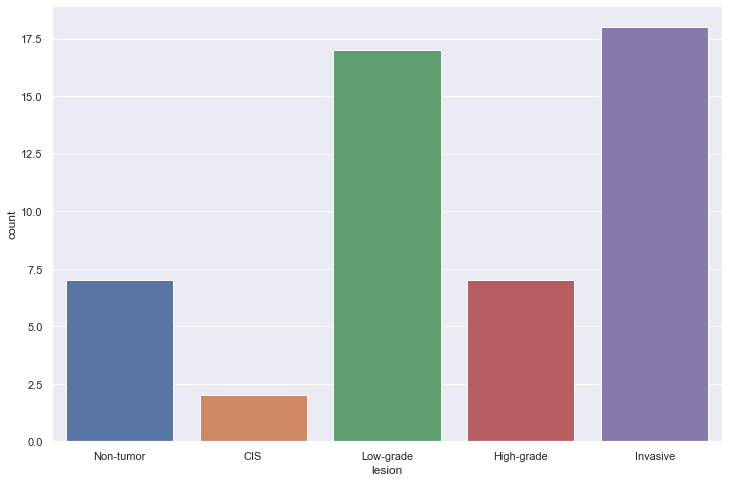

In [10]:
# Grade
df_sp = df_sp.astype({'lesion':'category'})
df_sp['lesion'].cat.reorder_categories(['Non-tumor','CIS','Low-grade','High-grade','Invasive'], ordered=True, inplace=True)
display(df['lesion'].value_counts(sort=False, dropna=False).to_frame())
g = sns.countplot(x='lesion', data=df_sp)

,recurrence_next
NaN,6
No,16
Yes,29


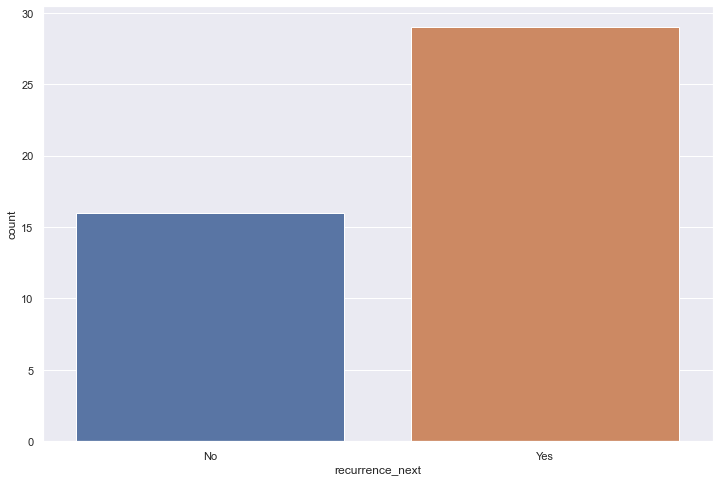

In [11]:
# Tumor recurrence at next biopsy
outcome = 'recurrence_next'
display(df_sp[outcome].value_counts(sort=False, dropna=False).to_frame())
g = sns.countplot(x=outcome, order=['No','Yes'], data=df_sp)

,recurrence_any
No,2
Yes,49


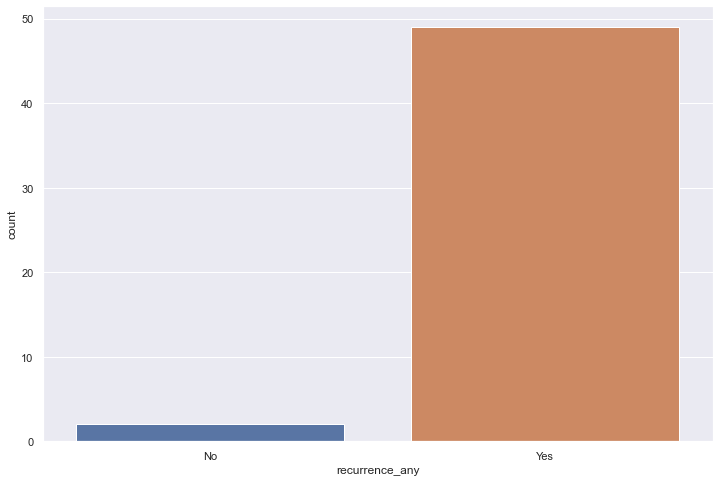

In [12]:
# Tumor recurrence at any biopsy
outcome = 'recurrence_any'
display(df_sp[outcome].value_counts(sort=False, dropna=False).to_frame())
g = sns.countplot(x=outcome, order=['No','Yes'], data=df_sp)

,progression_grade_next
NaN,4
No,45
Yes,2


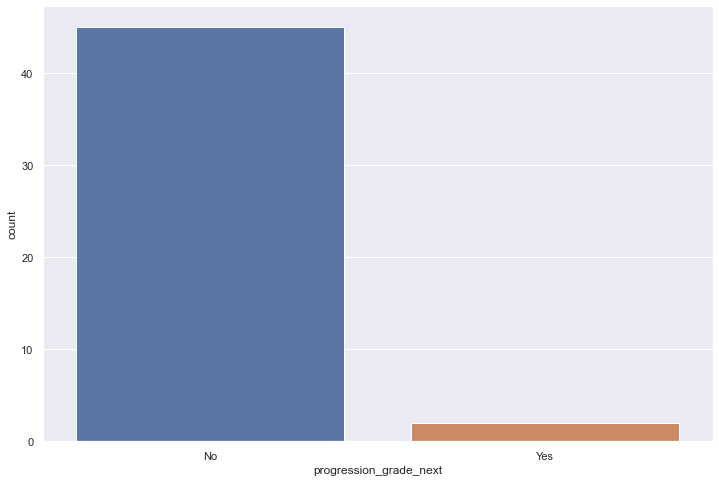

In [13]:
# Tumor grade progression at next biopsy
outcome = 'progression_grade_next'
display(df_sp[outcome].value_counts(sort=False, dropna=False).to_frame())
g = sns.countplot(x=outcome, order=['No','Yes'], data=df_sp)

,progression_grade_any
No,47
Yes,4


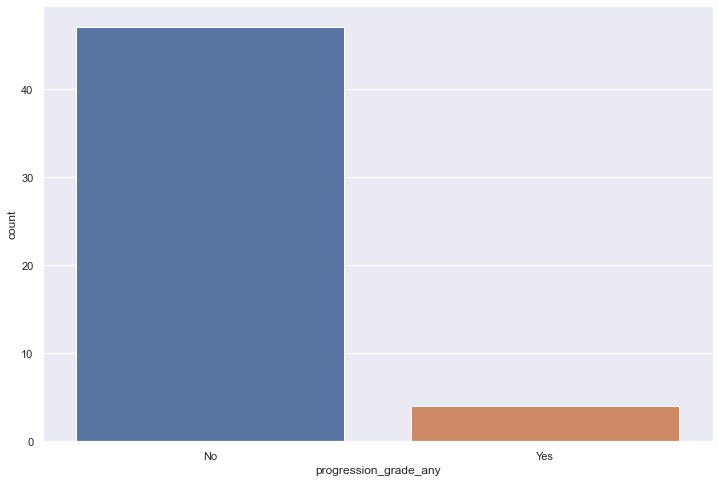

In [14]:
# Tumor grade progression at any biopsy
outcome = 'progression_grade_any'
display(df_sp[outcome].value_counts(sort=False, dropna=False).to_frame())
g = sns.countplot(x=outcome, order=['No','Yes'], data=df_sp)

,progression_stage_next
NaN,7
No,40
Yes,4


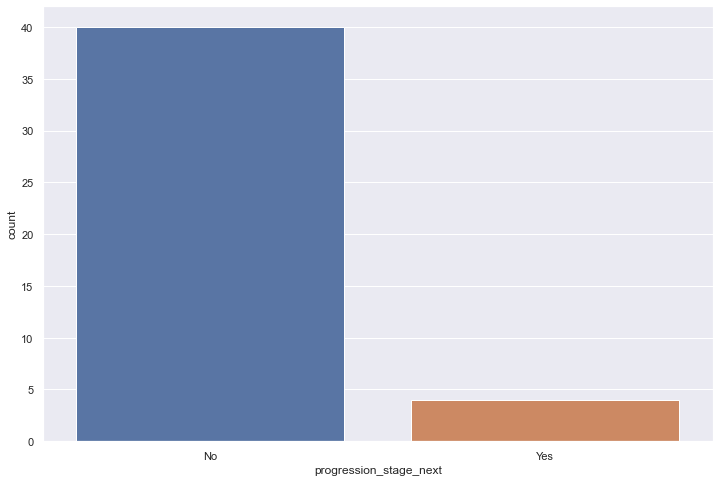

In [15]:
# Tumor stage progression at next biopsy
outcome = 'progression_stage_next'
display(df_sp[outcome].value_counts(sort=False, dropna=False).to_frame())
g = sns.countplot(x=outcome, order=['No','Yes'], data=df_sp)

,progression_stage_any
No,44
Yes,7


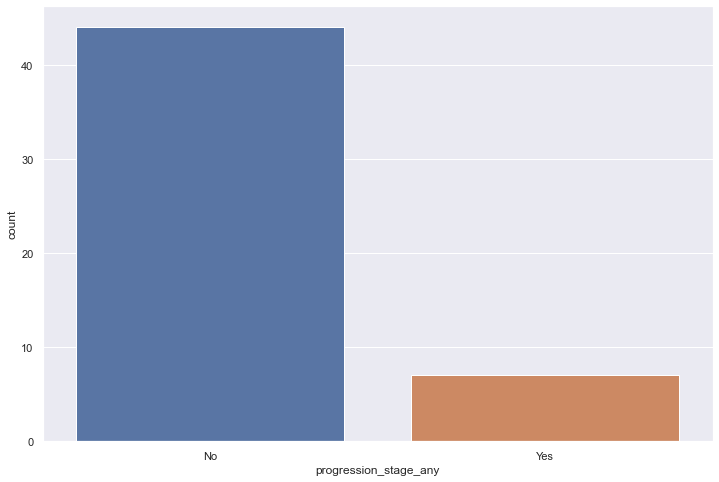

In [16]:
# Tumor stage progression at any biopsy
outcome = 'progression_stage_any'
display(df_sp[outcome].value_counts(sort=False, dropna=False).to_frame())
g = sns.countplot(x=outcome, order=['No','Yes'], data=df_sp)

# Marker features

,count,mean,std,min,25%,50%,75%,max
sting_tumor,30.0,21.0,30.0,0.0,0.0,6.0,30.0,90.0


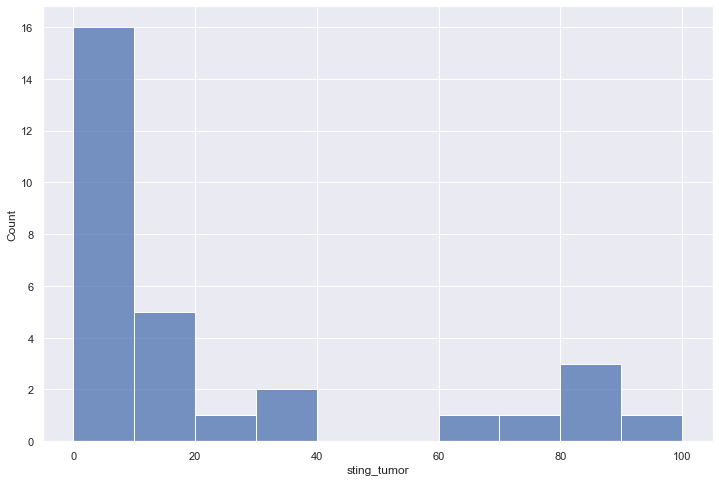

In [17]:
# STING in tumor cells
marker = 'sting_tumor'
display(df_sp[marker].describe().round().to_frame().transpose())
g = sns.histplot(x=marker, data=df_sp, binwidth=10, binrange=[0,100])

,count,mean,std,min,25%,50%,75%,max
sting_inflammatory,23.0,99.0,3.0,90.0,100.0,100.0,100.0,100.0


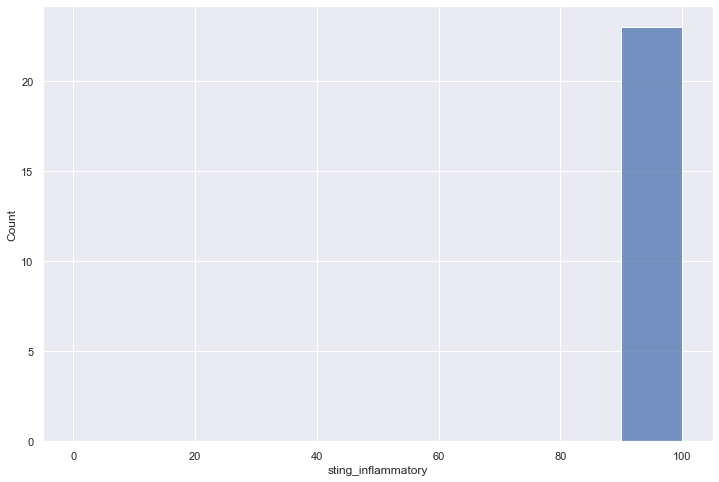

In [18]:
# STING in peritumoral lymphocytes
marker = 'sting_inflammatory'
display(df_sp[marker].describe().round().to_frame().transpose())
g = sns.histplot(x=marker, data=df_sp, binwidth=10, binrange=[0,100])

,count,mean,std,min,25%,50%,75%,max
cgas_tumor,30.0,67.0,33.0,0.0,36.0,80.0,92.0,100.0


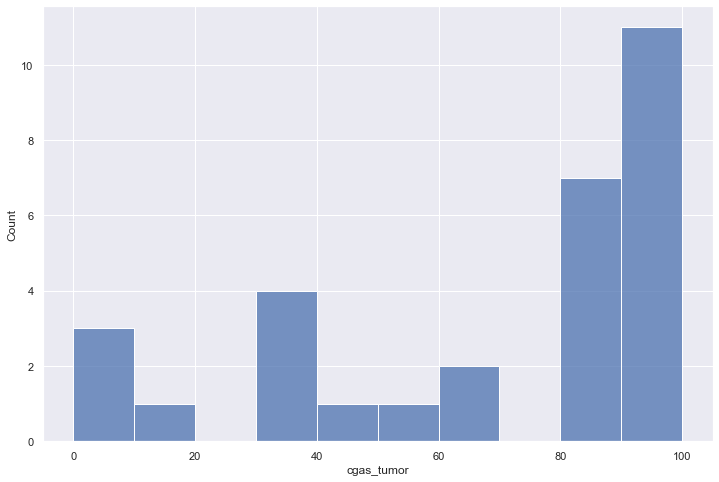

In [19]:
# cGAS in tumor cells
marker = 'cgas_tumor'
display(df_sp[marker].describe().round().to_frame().transpose())
g = sns.histplot(x=marker, data=df_sp, binwidth=10, binrange=[0,100])

,count,mean,std,min,25%,50%,75%,max
cgas_inflammatory,23.0,11.0,13.0,0.0,0.0,5.0,15.0,40.0


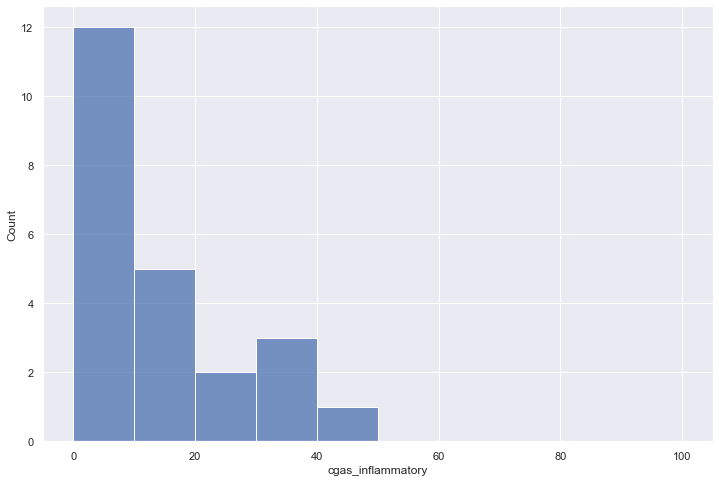

In [20]:
# cGAS in peritumoral lymphocytes
marker = 'cgas_inflammatory'
display(df_sp[marker].describe().round().to_frame().transpose())
g = sns.histplot(x=marker, data=df_sp, binwidth=10, binrange=[0,100])

,count,mean,std,min,25%,50%,75%,max
pirf3_tumor,30.0,14.0,29.0,0.0,0.0,0.0,6.0,100.0


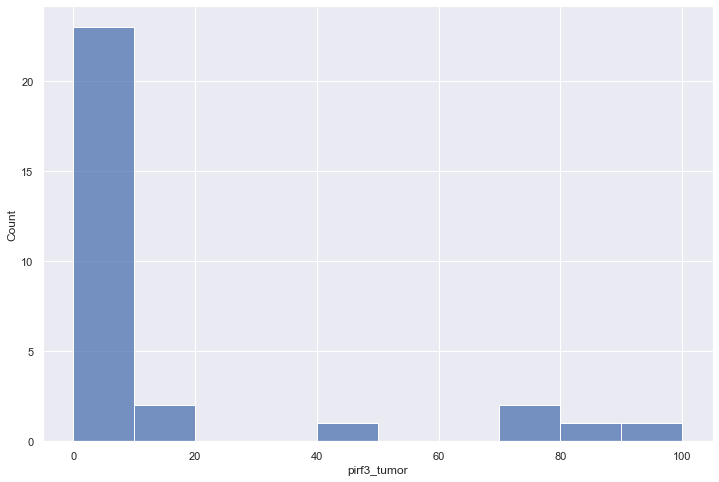

In [21]:
# pIRF3 in tumor cells
marker = 'pirf3_tumor'
display(df_sp[marker].describe().round().to_frame().transpose())
g = sns.histplot(x=marker, data=df_sp, binwidth=10, binrange=[0,100])

,count,mean,std,min,25%,50%,75%,max
pirf3_inflammatory,23.0,11.0,21.0,0.0,0.0,0.0,16.0,90.0


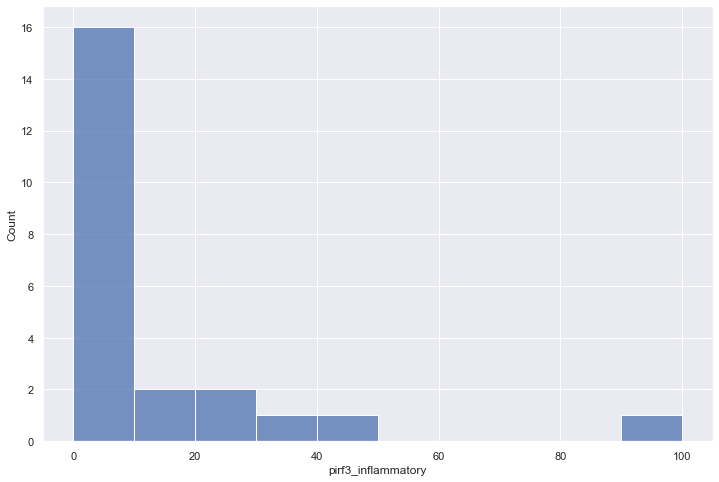

In [22]:
# pIRF3 in peritumoral lymphocytes
marker = 'pirf3_inflammatory'
display(df_sp[marker].describe().round().to_frame().transpose())
g = sns.histplot(x=marker, data=df_sp, binwidth=10, binrange=[0,100])